In [69]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import matplotlib.pyplot as plt

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [2]:
docs = litstudy.load_bibtex('geothermics/scopus.bib')

In [3]:
print(len(docs), 'papers laoades')

294 papers laoades


In [5]:
docs_ris = litstudy.load_ris_file('geothermics/scopus-1.ris')

<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

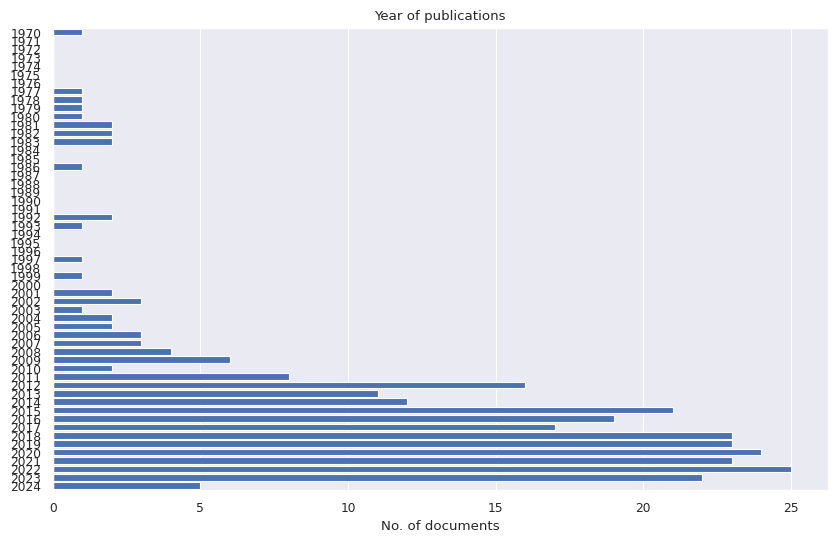

In [6]:
litstudy.plot_year_histogram(docs)

In [7]:
docs_filter = docs.filter_docs(lambda d: d.publication_year >= 2000)

<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

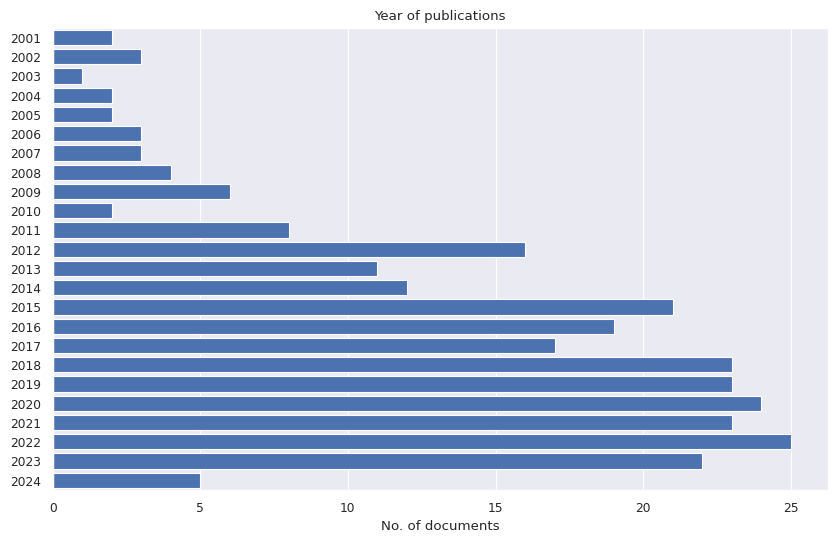

In [8]:
litstudy.plot_year_histogram(docs_filter)

<Axes: title={'center': 'Year of publications'}, ylabel='No. of documents'>

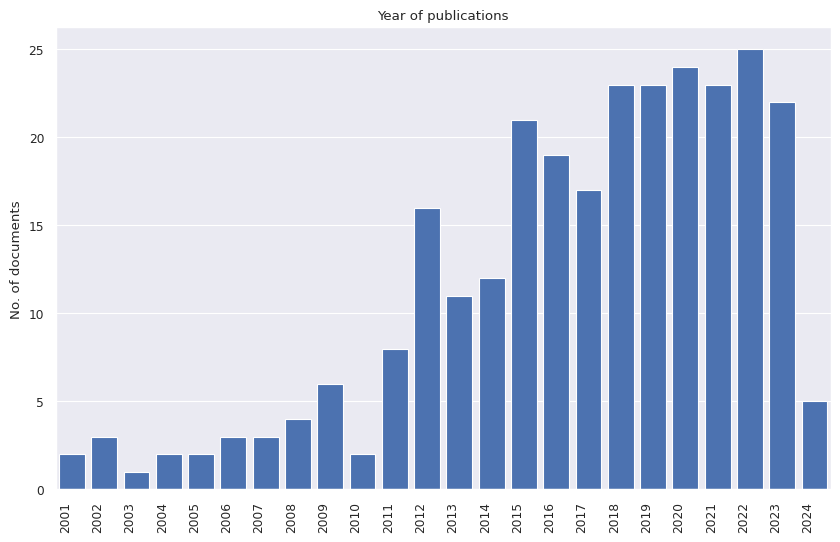

In [9]:
litstudy.plot_year_histogram(docs_filter, vertical=True)

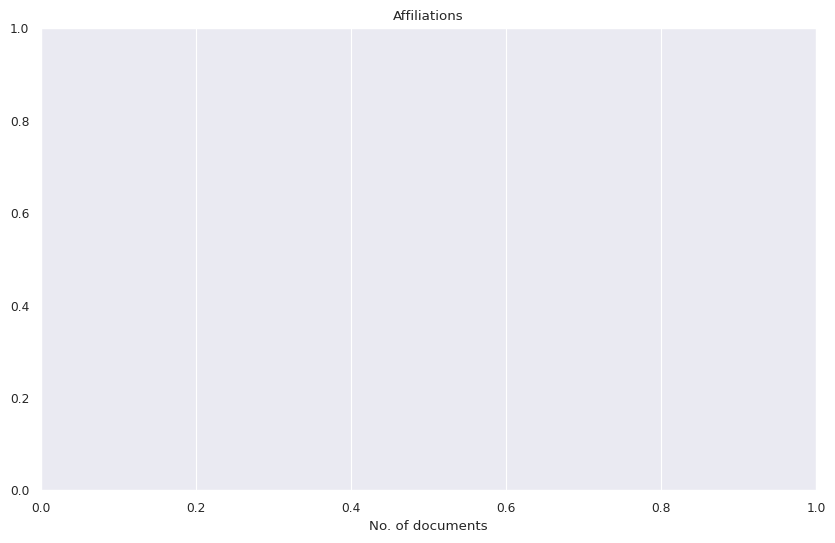

In [33]:
litstudy.plot_affiliation_histogram(docs_filter, limit=15);

In [23]:
docs[1].authors

[<Witkowska, Agata>, <Krawczyk, Dorota Anna>, <Rodero, Antonio>]

In [24]:
docs[1].affiliations

[]

In [26]:
docs[1].source_type

In [27]:
docs[1].keywords

['france',
 'lithuania',
 'poland [central europe]',
 'spain',
 'commerce',
 'energy efficiency',
 'geothermal heat pumps',
 'hot water distribution systems',
 'pumps',
 'surveys',
 'water',
 'domestic hot water',
 'domestic hot water preparation',
 'energy efficient',
 'heat pumps',
 'key technologies',
 'lithuania',
 'pump markets',
 'renewable energies',
 'statistic data',
 'statistical research',
 'alternative energy',
 'cooling',
 'energy efficiency',
 'heat flow',
 'heating',
 'pump',
 'heating']

In [28]:
docs[1].references

In [29]:
docs[1].citations

In [31]:
docs[1].abstract

"Becoming the world's first climate-neutral continent by 2050 is currently the most ambitious European goal. Heat pumps are the example of the key technology, which could help to achieve the aim by heating, cooling and domestic hot water (DHW) preparation in an ecological and energy-efficient way. This article characterized a heat pump market in Europe between 2009 and 2020 with a special regard to France, Spain, Poland and Lithuania, for which a more detailed study was presented. The analysis was performed primarily on the grounds of statistics data provided by the European Heat Pump Association (EHPA), which determined the number of heat pumps sold based on standard questionnaires from national heat pump associations, statistical offices and research institutes. The highest number of heat pump sold in analysed period of time was recorded in France, Italy, Sweden, Norway, Germany and Spain. Poland was in the middle of the list, while Lithuania was one of the last countries. Considerin

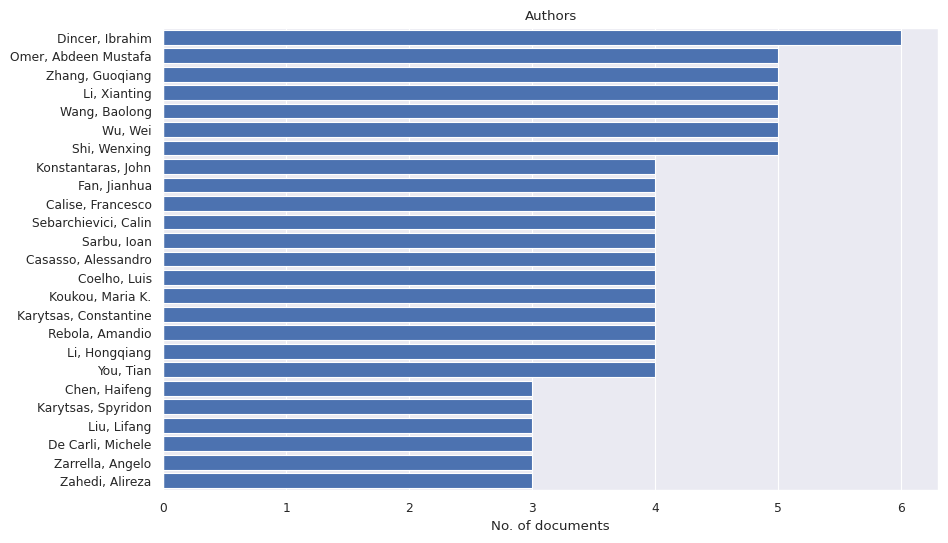

In [32]:
litstudy.plot_author_histogram(docs);

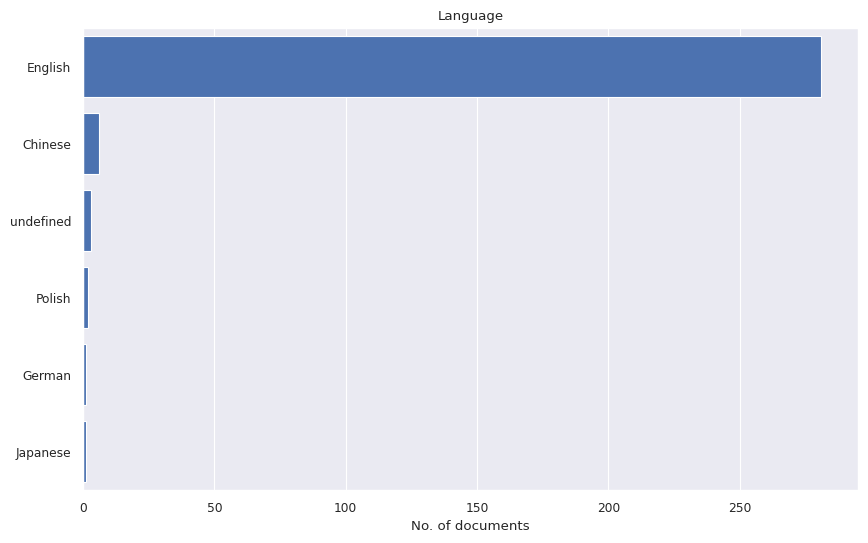

In [34]:
litstudy.plot_language_histogram(docs);

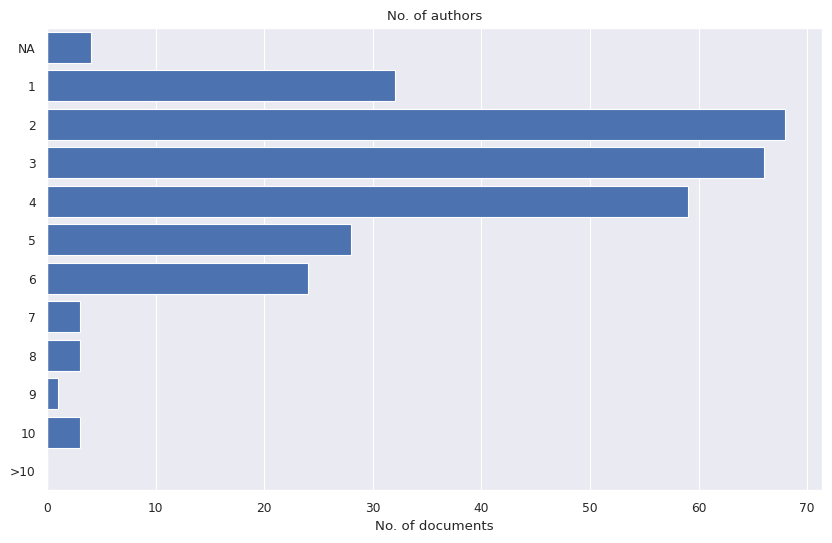

In [35]:
litstudy.plot_number_authors_histogram(docs);

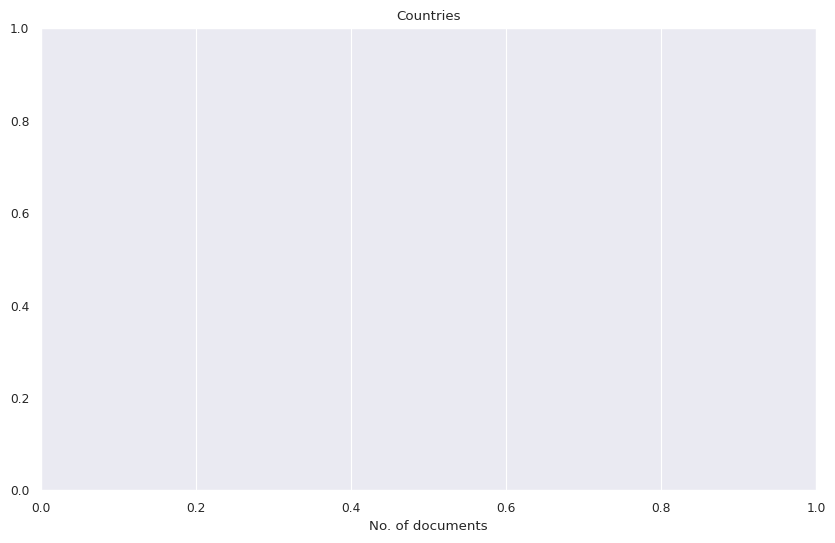

In [36]:
litstudy.plot_country_histogram(docs, limit=15);

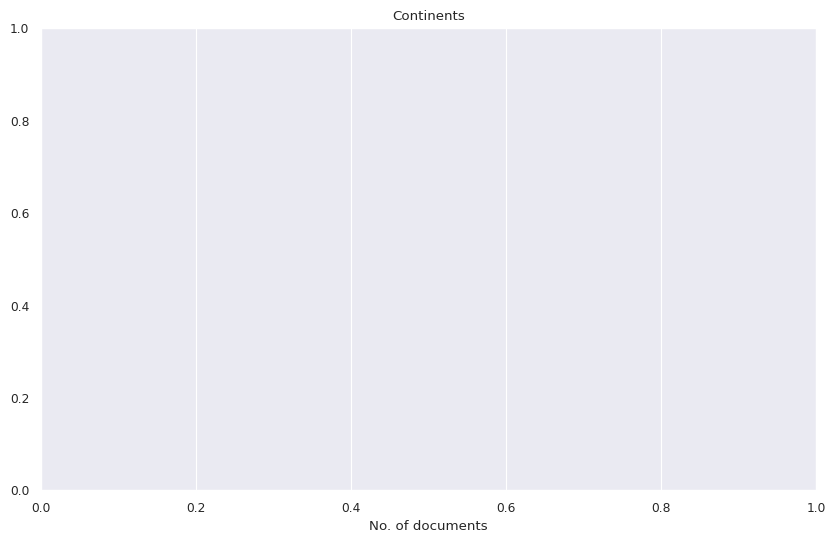

In [37]:
litstudy.plot_continent_histogram(docs);

In [38]:
litstudy.plot_cocitation_network(docs, max_edges=500)

no edges given


In [39]:
docs_total = docs - docs_ris

In [40]:
litstudy.plot_cocitation_network(docs_total, max_edges=500)

no edges given


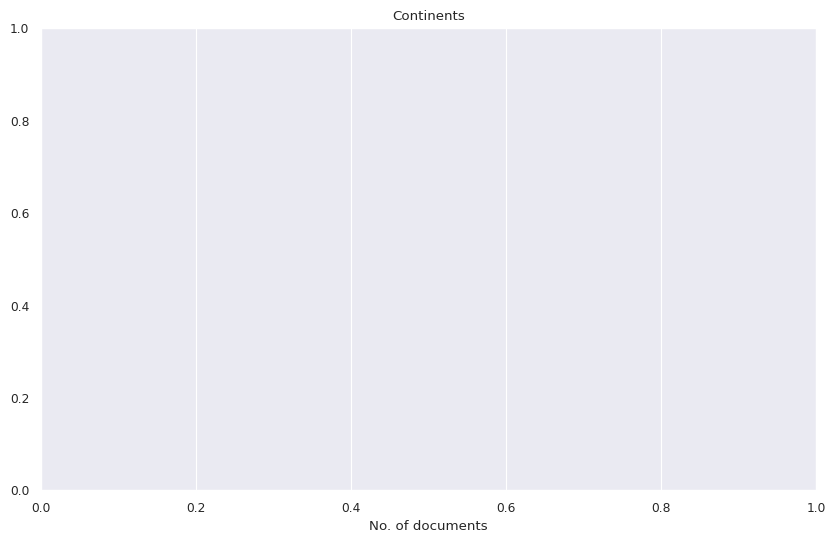

In [42]:
litstudy.plot_continent_histogram(docs_total);

In [44]:
docs_ris[1].authors

In [4]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)

In [5]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
author_exclusive,6
authors_licensee,13
carbon_dioxide,12
direct_expansion,9
emphasised_utilisation,5
energetically_exergetically,5
environmentally_friendly,7
european_union,5
flat_plate,6
fossil_fuel,21


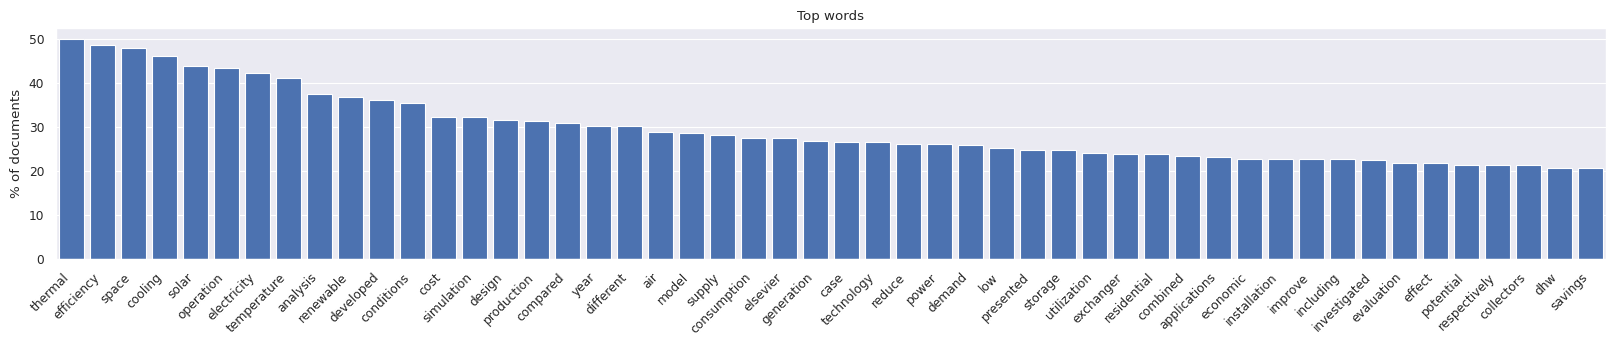

In [72]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);
plt.savefig('histogra.png',bbox_inches='tight')

In [68]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)


AttributeError: module 'matplotlib' has no attribute 'savefig'

In [8]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['gshp', 'dhw', 'cop', 'temperature', 'cost']
Topic 2: ['exergy', 'hydrogen', 'cycle', 'power', 'thermodynamic']
Topic 3: ['gshp', 'utilisation', 'direct_expansion', 'expansion', 'stimulate']
Topic 4: ['papers', 'engineering', 'conference', 'room', 'technical']
Topic 5: ['solar', 'zero', 'nearly_zero', 'nearly', 'community']
Topic 6: ['turkey', 'countries', 'greenhouse', 'potential', 'clean']
Topic 7: ['storage', 'tank', 'phase_change', 'material', 'phase']
Topic 8: ['kwh', 'homes', 'hospital', 'natural_gas', 'natural']
Topic 9: ['china', 'technology', 'shallow', 'residences', 'beijing']
Topic 10: ['hybrid', 'economic', 'investment', 'individual', 'gas']
Topic 11: ['district', 'community', 'network', 'project', 'plan']
Topic 12: ['gchp', 'coupled', 'simulation', 'load', 'compensation']
Topic 13: ['monitoring', 'canada', 'centre', 'aquifer', 'conservation']
Topic 14: ['mode', 'spf', 'test', 'house', 'family']
Topic 15: ['pvt', 'collectors', 'sagshp', 'solar', 'photovoltaic']


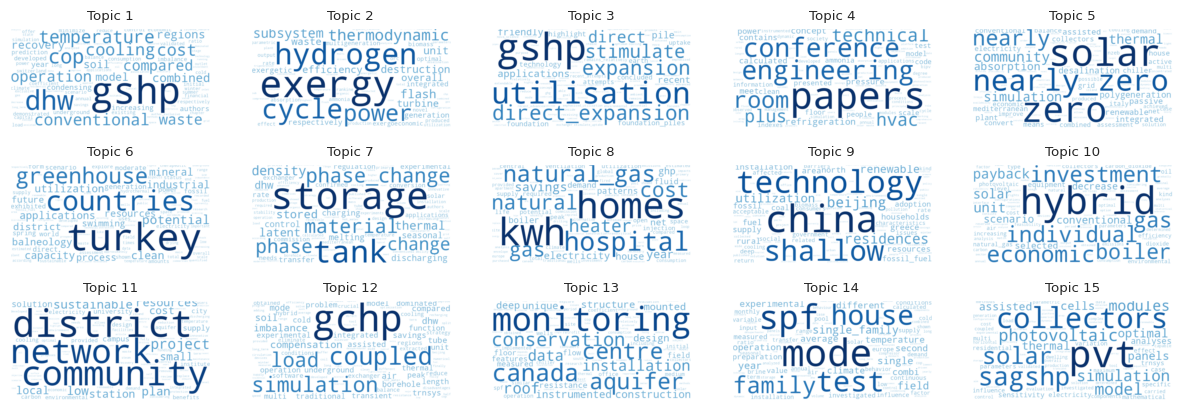

In [73]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);
plt.savefig('cloud.png',bbox_inches='tight')

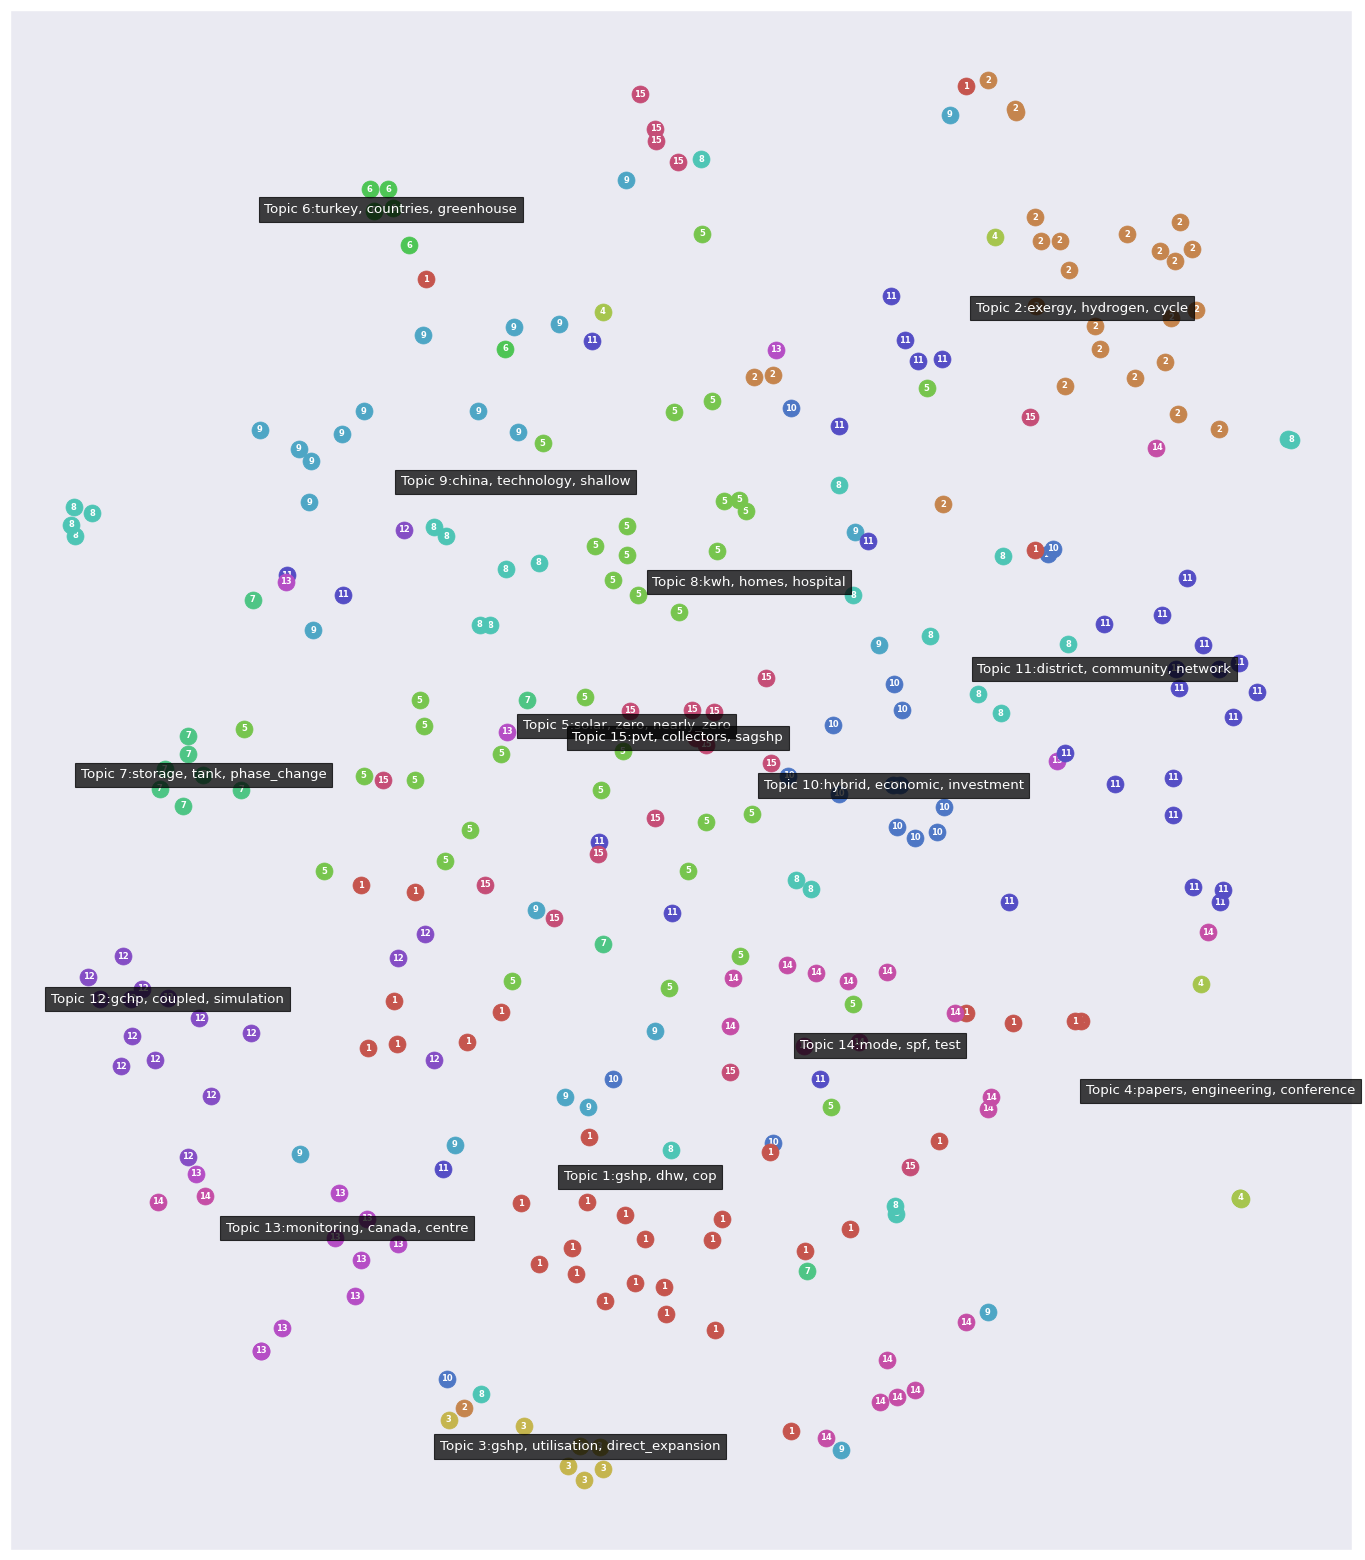

In [74]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);
plt.savefig('graphs.png',bbox_inches='tight')

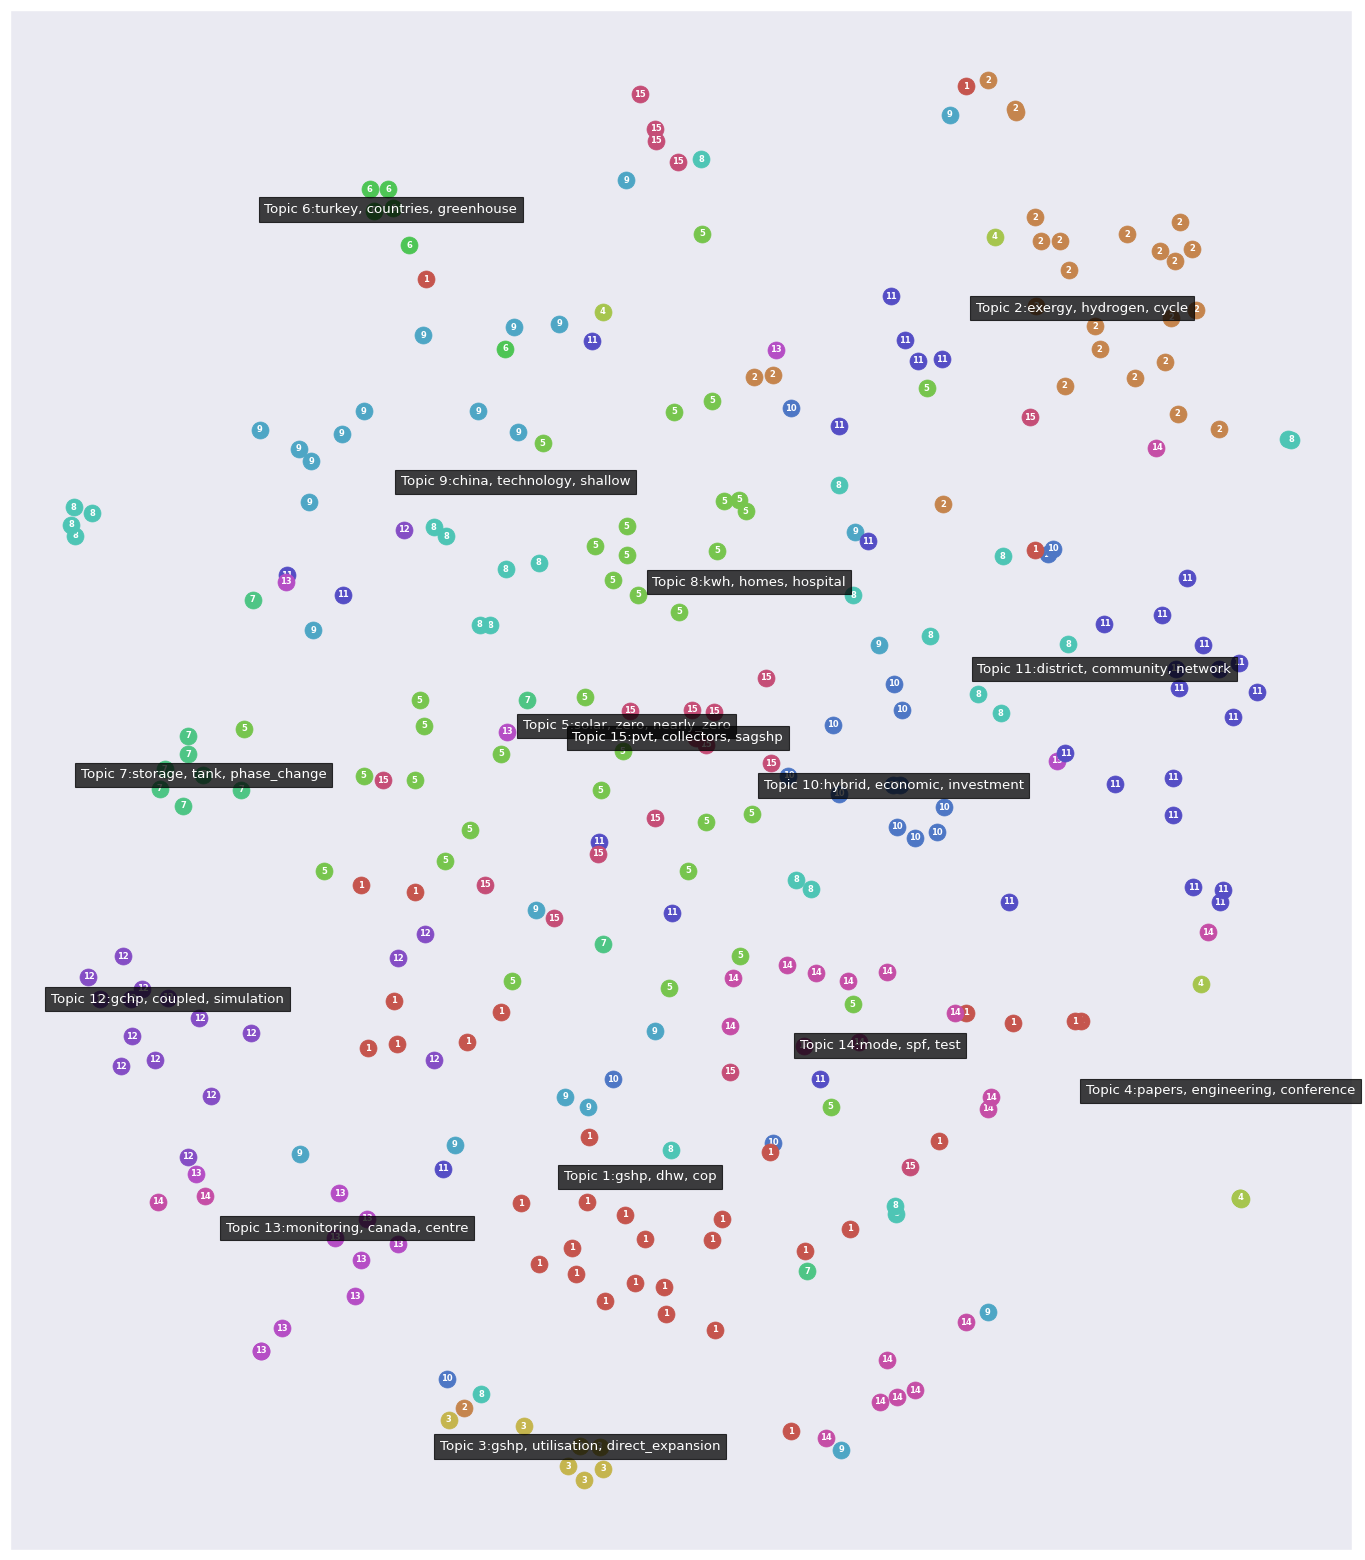

In [10]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

In [12]:
topic_id = topic_model.best_topic_for_token('hybrid')

In [13]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

Research on Optimal Matching of Solar-assisted Ground-coupled Heat Pump Domestic Hot Water System
Operation assessment of hybrid heat source for heating the building and preparation of hot water in the fire brigade building
Hybrid geotabs: System concept, individual modules, and interfaces
Measures for Assessing the Effectiveness of Investments for Electricity and Heat Generation from the Hybrid Cooperation of a Photovoltaic Installation with a Heat Pump on the Example of a Household
Performance assessment of a novel hybrid district energy system
Feasibility study of a heating, cooling and domestic hot water system combining a photovoltaic-thermal system and a ground source heat pump
Support of solar energy on hybrid system
Feasibility of solar-geothermal hybrid source heat pump for producing domestic hot water in hot climates; [Faisabilité d'une pompe à chaleur solaire-géothermique hybride pour la production d'eau chaude sanitaire dans les climats chauds]
Factors affecting willingness

In [16]:
for doc in docs:
    print(doc.pages)

AttributeError: 'BibDocument' object has no attribute 'pages'

In [23]:
df = pd.read_csv("geothermics/scopus.csv")

In [24]:
print(df)

                                               Authors  \
0    Gonçalves D.; Neto R.C.; Marques J.M.; Figueir...   
1               Witkowska A.; Krawczyk D.A.; Rodero A.   
2                     Huo Y.; Yan T.; Chang X.; Pan W.   
3    Santamarta J.C.; Pacheco G.L.; Rodríguez-Martí...   
4     Chen P.; liu Y.; Xu Y.; Ning H.; Qin Y.; Wang Z.   
..                                                 ...   
296                 Acikgoz O.; Akbulut U.; Agustos H.   
297                                       Tiljander P.   
298               Morofsky E.L.; Cataford R.; Mirza C.   
299          Cui P.; Diao N.; Yang H.; Fang Z.; Sun C.   
300                                        Reynolds G.   

                                     Author full names  \
0    Gonçalves, Diogo (57615886400); Neto, Rui Cost...   
1    Witkowska, Agata (57203268308); Krawczyk, Doro...   
2    Huo, Yingjie (57452004300); Yan, Ting (5720959...   
3    Santamarta, Juan C. (55203666100); Pacheco, Gi...   
4    Chen, Pe

In [29]:
for ind in df.index:
    print(df['Page start'][ind], df['Page end'][ind])

275 279
840 852
nan nan
133 135
nan nan
nan nan
nan nan
nan nan
556 564
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
184 196
nan nan
nan nan
nan nan
328 342
36 41
103 130
nan nan
nan nan
217 257
1039 1045
177 188
nan nan
1023 1034
nan nan
nan nan
nan nan
1293 1304
nan nan
nan nan
187 209
1 12
nan nan
nan nan
nan nan
915 920
nan nan
nan nan
26 32
nan nan
1110 1125
5608 5628
nan nan
nan nan
410 416
nan nan
nan nan
1132 1146
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
191 198
318 336
nan nan
nan nan
nan nan
171 189
nan nan
nan nan
nan nan
1 29
nan nan
nan nan
732 742
1224 1242
321 330
374 383
nan nan
nan nan
131 138
581 594
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
37 48
330 353
nan nan
274 281
nan nan
nan nan
2005 2028
nan nan
516 531
426 438
nan nan
488 498
962 974
nan nan
nan nan
nan nan
252 271
591 603
127 144
nan nan
nan nan
nan nan
236 245
nan nan
259 269
502 514
4223 4230
nan nan
99 199
28 37
3799 3806
100 113
192 203
37 

In [61]:
n = 0
for ind in df.index:
    print(ind, df['Page end'][ind], type(df['Page end'][ind]),df['Page start'][ind], type(df['Page start'][ind]))
    end = int(df['Page end'][ind]) if type(df['Page end'][ind]) == str else 0
    start = int(df['Page start'][ind]) if type(df['Page start'][ind]) == str else 0
    print(end, start)
    n +=  end - start 

0 279 <class 'str'> 275 <class 'str'>
279 275
1 852 <class 'str'> 840 <class 'str'>
852 840
2 nan <class 'float'> nan <class 'float'>
0 0
3 135 <class 'str'> 133 <class 'str'>
135 133
4 nan <class 'float'> nan <class 'float'>
0 0
5 nan <class 'float'> nan <class 'float'>
0 0
6 nan <class 'float'> nan <class 'float'>
0 0
7 nan <class 'float'> nan <class 'float'>
0 0
8 564 <class 'str'> 556 <class 'str'>
564 556
9 nan <class 'float'> nan <class 'float'>
0 0
10 nan <class 'float'> nan <class 'float'>
0 0
11 nan <class 'float'> nan <class 'float'>
0 0
12 nan <class 'float'> nan <class 'float'>
0 0
13 nan <class 'float'> nan <class 'float'>
0 0
14 nan <class 'float'> nan <class 'float'>
0 0
15 nan <class 'float'> nan <class 'float'>
0 0
16 nan <class 'float'> nan <class 'float'>
0 0
17 nan <class 'float'> nan <class 'float'>
0 0
18 196 <class 'str'> 184 <class 'str'>
196 184
19 nan <class 'float'> nan <class 'float'>
0 0
20 nan <class 'float'> nan <class 'float'>
0 0
21 nan <class 'float'> 

ValueError: invalid literal for int() with base 10: 'II684'

In [63]:
print(n)

1490


In [34]:
import math 

In [64]:
topic_id = topic_model.best_topic_for_token('gchp')

In [65]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

A new ground-coupled heat pump system integrated with multi-mode air-water heat exchanger to eliminate thermal imbalance
A new ground-coupled heat pump system integrated with a multi-mode air-source heat compensator to eliminate thermal imbalance in cold regions
Performance of an experimental ground-coupled heat pump system for heating, cooling and domestic hot-water operation
Performance analysis of hybrid ground-coupled heat pump system with multi-functions
Ground-coupled heat pump and energy storange
Assessment of energetic, economic and environmental performance of ground-coupled heat pumps
Study on the hybrid GCHP system with a desuperheater
Thermal performance of the vertical ground heat exchanger with a novel elliptical single U-tube
Development of deemed energy and demand savings for residential ground-source heat pump residential in the state of Texas
Performance assessment between a ground coupled and air source heat pump used for domestic hot water preparation
